<font size=5> In this example we are presented with car sales data, from which we intend to estimate the probability of success in a given sale. </font>

# Getting and refining data

In [2]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


Changing model_year column to age for a more precise model fitting

In [3]:
data['age'] = 2022 - data['model_year']
data = data.drop(['model_year'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)


In [4]:
data

,mileage_per_year,price,sold,age
0,21801,30941.02,yes,22
1,7843,40557.96,yes,24
2,7109,89627.50,no,16
3,26823,95276.14,no,7
4,7935,117384.68,yes,8
...,...,...,...,...
9995,15572,97112.86,no,16
9996,13246,107424.63,yes,20
9997,13018,93856.99,no,8
9998,10464,51250.57,yes,11


*Here we are replacing: "yes"=1 and "no"=0*

In [5]:
for x in data.index:
  if (data.sold[x] == "yes"):
    data.sold[x] = 1
  else:
    data.sold[x] = 0

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_25500\4245684757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sold[x] = 1
C:\Users\kaiqu\AppData\Local\Temp\ipykernel_25500\4245684757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sold[x] = 0


In [6]:
data.head()

,mileage_per_year,price,sold,age
0,21801,30941.02,1,22
1,7843,40557.96,1,24
2,7109,89627.50,0,16
3,26823,95276.14,0,7
4,7935,117384.68,1,8


# Some graphs

In [7]:
import seaborn as sns

<Axes: xlabel='price', ylabel='mileage_per_year'>

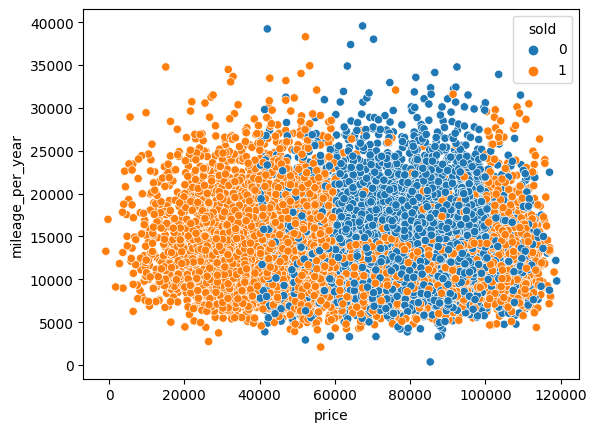

In [8]:
sns.scatterplot(data=data, x= data.price, y=data.mileage_per_year, hue=data.sold)

<Axes: xlabel='age', ylabel='Count'>

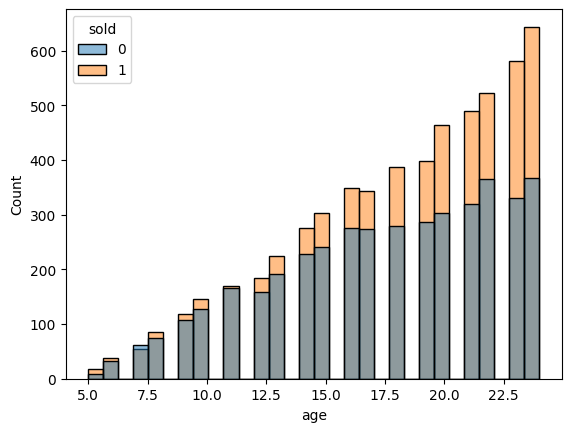

In [9]:
sns.histplot(data=data, x=data.age, hue=data.sold)

<Axes: xlabel='price', ylabel='Count'>

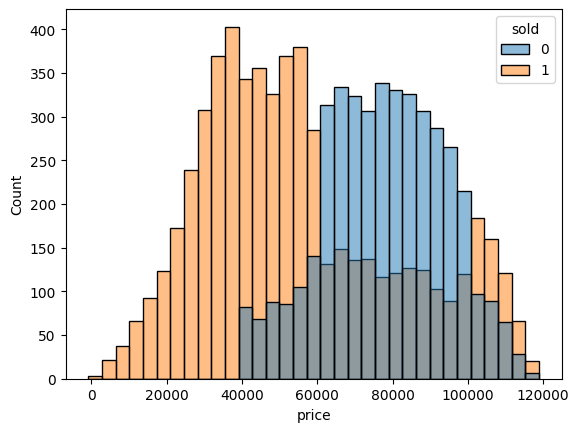

In [10]:
sns.histplot(data=data, x=data.price, hue=data.sold)

<Axes: xlabel='mileage_per_year', ylabel='Count'>

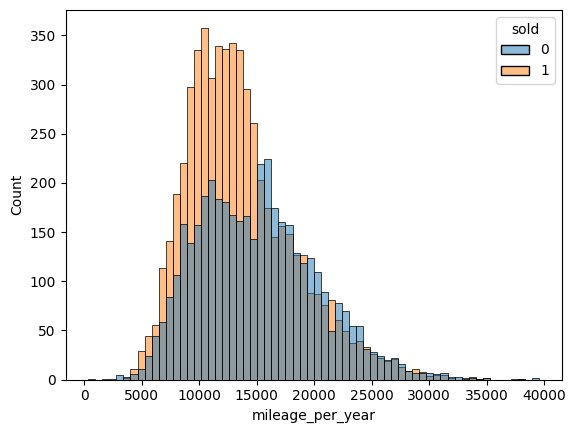

In [11]:
sns.histplot(data=data, x=data.mileage_per_year, hue=data.sold)

# Fitting our data to a model and estimating it's accuracy

In [12]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [13]:
test_data = data[["mileage_per_year", "age", "price"]]
data.sold = data.sold.astype('int')

In [14]:
score_array = []
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(test_data, data.sold, test_size = 0.33, stratify=data.sold, random_state=i)

  model = svm.SVC()
  model.fit(x_train, y_train)

  predicted = model.predict(x_test)
  predicted = predicted.reshape(-1,1)

  score = accuracy_score(y_test, predicted) * 100
  score_array.append(score)


In [15]:
import statistics
print('We have an estimated mean accuracy of %.2f%%' % score)


We have an estimated mean accuracy of 77.24%


# Saving our model to a file

In [16]:
import pickle
filename = 'car_sales_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Loading Model

In [17]:
import pickle
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [18]:
filename = 'car_sales_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7724242424242425


# <font size=7> Test your sale estimated result.</font>

<font size=4>Please type below your sale's data:</font>

In [19]:
price = input('Price: '+'$')
age = input('Age: ')
mileage = input('Mileage: ')

my_sale_data = {'mileage_per_year':[mileage], 'age':[age], 'price':[price]}
new_prediction = pd.DataFrame(data = my_sale_data)
new_predition = new_prediction.reset_index()

print('')
if (loaded_model.predict(new_prediction) == [1]):
    print('Your car will probabily sell :)')
else:
    print('Your car probabily will NOT sell :(')

ValueError: could not convert string to float: ''

In [20]:
x_test

,mileage_per_year,age,price
7279,18990,12,108665.70
439,17981,21,27716.48
739,10685,16,82130.68
1220,9875,16,58874.60
3017,18844,22,28801.63
...,...,...,...
2390,15917,18,57949.70
1674,17280,10,90131.41
3236,5899,20,36881.21
5634,14653,14,42090.21


In [21]:
appended_training_data = pd.concat([x_test, y_test], axis=1)
appended_training_data = appended_training_data.reset_index()

appended_training_data


,index,mileage_per_year,age,price,sold
0,7279,18990,12,108665.70,1
1,439,17981,21,27716.48,1
2,739,10685,16,82130.68,0
3,1220,9875,16,58874.60,0
4,3017,18844,22,28801.63,1
...,...,...,...,...,...
3295,2390,15917,18,57949.70,0
3296,1674,17280,10,90131.41,0
3297,3236,5899,20,36881.21,1
3298,5634,14653,14,42090.21,1


In [22]:
predicted_df = pd.DataFrame(predicted)
predicted_df

,0
0,1
1,1
2,0
3,1
4,1
...,...
3295,1
3296,0
3297,1
3298,1


In [23]:
appended_training_data = pd.concat([appended_training_data, predicted_df], axis=1)
appended_training_data

,index,mileage_per_year,age,price,sold,0
0,7279,18990,12,108665.70,1,1
1,439,17981,21,27716.48,1,1
2,739,10685,16,82130.68,0,0
3,1220,9875,16,58874.60,0,1
4,3017,18844,22,28801.63,1,1
...,...,...,...,...,...,...
3295,2390,15917,18,57949.70,0,1
3296,1674,17280,10,90131.41,0,0
3297,3236,5899,20,36881.21,1,1
3298,5634,14653,14,42090.21,1,1


In [24]:
rename_dict = {
    0 : "predicted"}

appended_training_data.rename(columns=rename_dict, inplace=True)

appended_training_data

,index,mileage_per_year,age,price,sold,predicted
0,7279,18990,12,108665.70,1,1
1,439,17981,21,27716.48,1,1
2,739,10685,16,82130.68,0,0
3,1220,9875,16,58874.60,0,1
4,3017,18844,22,28801.63,1,1
...,...,...,...,...,...,...
3295,2390,15917,18,57949.70,0,1
3296,1674,17280,10,90131.41,0,0
3297,3236,5899,20,36881.21,1,1
3298,5634,14653,14,42090.21,1,1


In [25]:
appended_training_data["correct"] = (appended_training_data["sold"] == appended_training_data["predicted"])
appended_training_data["correct"]= appended_training_data["correct"].astype(int)

appended_training_data

,index,mileage_per_year,age,price,sold,predicted,correct
0,7279,18990,12,108665.70,1,1,1
1,439,17981,21,27716.48,1,1,1
2,739,10685,16,82130.68,0,0,1
3,1220,9875,16,58874.60,0,1,0
4,3017,18844,22,28801.63,1,1,1
...,...,...,...,...,...,...,...
3295,2390,15917,18,57949.70,0,1,0
3296,1674,17280,10,90131.41,0,0,1
3297,3236,5899,20,36881.21,1,1,1
3298,5634,14653,14,42090.21,1,1,1


In [26]:
appended_training_data.correct

0       1
1       1
2       1
3       0
4       1
       ..
3295    0
3296    1
3297    1
3298    1
3299    0
Name: correct, Length: 3300, dtype: int32

<Axes: xlabel='mileage_per_year', ylabel='price'>

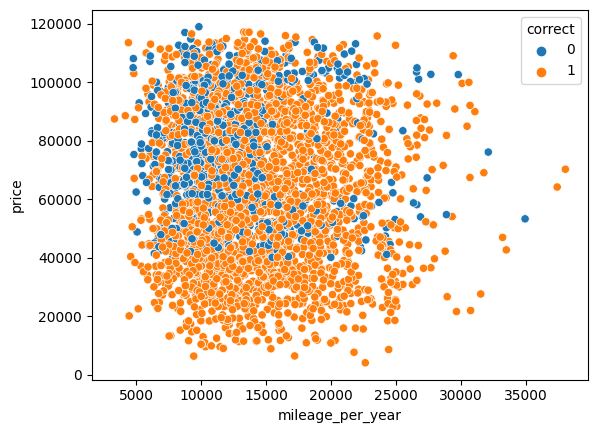

In [27]:
sns.scatterplot(data=appended_training_data, x=appended_training_data.mileage_per_year, y=appended_training_data.price, hue=appended_training_data.correct)

In [28]:
data_to_plot = appended_training_data.sample(frac=0.1, random_state= 64)

<Axes: xlabel='price', ylabel='mileage_per_year'>

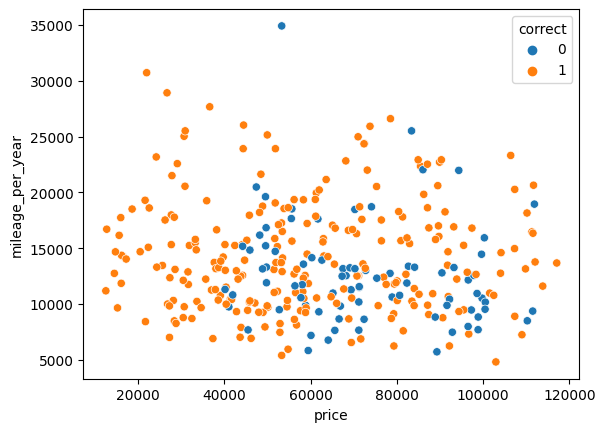

In [29]:
sns.scatterplot(data=data_to_plot, x=data_to_plot.price, y=data_to_plot.mileage_per_year, hue=data_to_plot.correct)

[Text(0.5, 0, 'Age')]

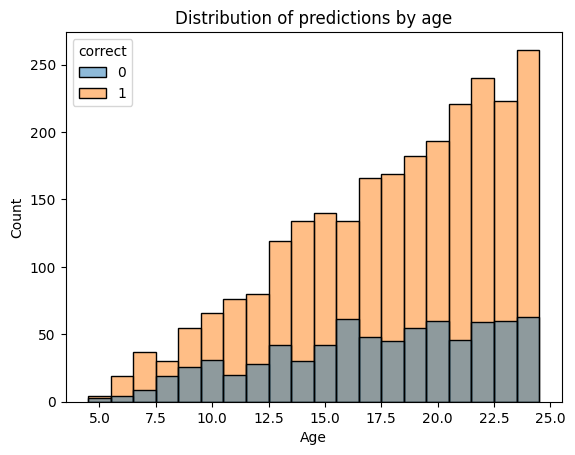

In [42]:
fig1 = sns.histplot(data=appended_training_data, x=appended_training_data.age, hue=appended_training_data.correct, discrete=True)
fig1.set(title="Distribution of predictions by age")
fig1.set(xlabel ="Age")

[Text(0.5, 0, 'Age')]

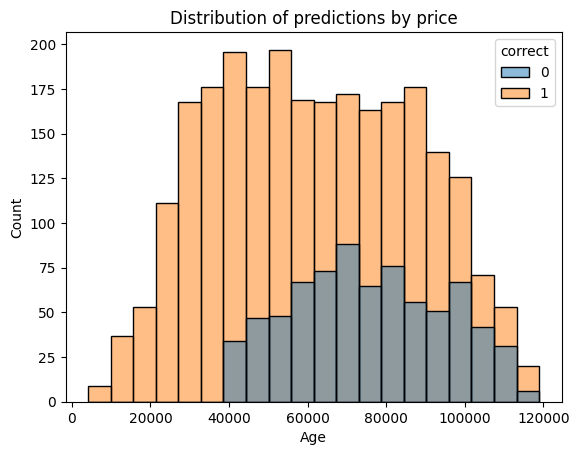

In [41]:
fig2 = sns.histplot(data=appended_training_data, x=appended_training_data.price, hue=appended_training_data.correct, bins=20, multiple="layer")
fig2.set(title="Distribution of predictions by price")
fig2.set(xlabel ="Age")

In [ ]:
appended_training_data.to_csv("appended_training_data", index= False)
data_to_plot.to_csv("data_to_plot", index= False)